### Match Outcome Prediction ###

**Problem Statement** - Goal is to predict the outcome of the football match. 

### Import necessary libraries ####

In [1]:
import pandas as pd #to read dataset
import numpy as np #for scientific Calculations

### About Preprocessing ###

The data I obtained is already structured data. For every Data Science Problem, before going to the model we need to do some **Data Preprocessig and Exploratory Data Analysis** to get some insights about what actually the data is? In this Ipython notebook I will explain each and every step I carried out.

### Read the dataset ###

In [2]:
train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

print("Training Dataset Shape:{}".format(train_dataset.shape))
print("Test Dataset Shape:{}".format(test_dataset.shape))

Training Dataset Shape:(12789, 19)
Test Dataset Shape:(1530, 18)


In [3]:
#get the info about the dataset
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12789 entries, 0 to 12788
Data columns (total 19 columns):
AC          12780 non-null float64
AF          12778 non-null float64
AR          12780 non-null float64
AS          12780 non-null float64
AST         12780 non-null float64
AY          12780 non-null float64
AwayTeam    12782 non-null object
Date        12782 non-null object
FTR         12782 non-null object
HC          12780 non-null float64
HF          12778 non-null float64
HR          12780 non-null float64
HS          12780 non-null float64
HST         12780 non-null float64
HTAG        12779 non-null float64
HTHG        12779 non-null float64
HY          12779 non-null float64
HomeTeam    12782 non-null object
league      12789 non-null object
dtypes: float64(14), object(5)
memory usage: 1.9+ MB


### Exploratory Data Analysis ###

While seeing the information about the dataset there are some null values present in the column. The total dataset shape is 12789. Only 9 null rows are present in the dataset, dropping the null rows is a good option here. Since it is the Football match data the data should be more accurate. ie.., **Away Team shots(AS), Away Team Fouls(AF)** can't be filled up with mean or average value in this case. Filling mean and average value works well for Continous data.

In [4]:
get_columns = list(train_dataset.columns)

for cols in get_columns:
    index_cols = train_dataset[train_dataset[cols].isnull()].index.tolist()
    print("For Column:{}, Index value:{}".format(cols, index_cols))

For Column:AC, Index value:[7082, 7408, 9363, 11298, 11644, 11645, 11646, 12027, 12408]
For Column:AF, Index value:[5620, 5733, 7082, 7408, 9363, 11298, 11644, 11645, 11646, 12027, 12408]
For Column:AR, Index value:[7082, 7408, 9363, 11298, 11644, 11645, 11646, 12027, 12408]
For Column:AS, Index value:[7082, 7408, 9363, 11298, 11644, 11645, 11646, 12027, 12408]
For Column:AST, Index value:[7082, 7408, 9363, 11298, 11644, 11645, 11646, 12027, 12408]
For Column:AY, Index value:[7082, 7408, 9363, 11298, 11644, 11645, 11646, 12027, 12408]
For Column:AwayTeam, Index value:[7082, 9363, 11644, 11645, 11646, 12027, 12408]
For Column:Date, Index value:[7082, 9363, 11644, 11645, 11646, 12027, 12408]
For Column:FTR, Index value:[7082, 9363, 11644, 11645, 11646, 12027, 12408]
For Column:HC, Index value:[7082, 7408, 9363, 11298, 11644, 11645, 11646, 12027, 12408]
For Column:HF, Index value:[5620, 5733, 7082, 7408, 9363, 11298, 11644, 11645, 11646, 12027, 12408]
For Column:HR, Index value:[7082, 740

From above information we can see that index values have null data except league. Explore more about these data.

In [5]:
null_index_columns = [5620, 5733, 7082, 7408, 9363, 11298, 11644, 11645, 11646, 12027, 12408]
train_dataset.iloc[null_index_columns]

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league
5620,5.0,NaN,0.0,6.0,3.0,3.0,Marseille,18/09/11,H,3.0,NaN,0.0,10.0,5.0,0.0,2.0,0.0,Lyon,ligue-1
5733,1.0,NaN,0.0,9.0,3.0,5.0,Nancy,17/12/11,A,8.0,NaN,0.0,9.0,1.0,1.0,0.0,2.0,Caen,ligue-1
7082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ligue-1
7408,NaN,NaN,NaN,NaN,NaN,NaN,Lyon,16/04/17,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bastia,ligue-1
9363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,premier-league
11298,NaN,NaN,NaN,NaN,NaN,NaN,Roma,23/09/12,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cagliari,serie-a
11644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,serie-a
11645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,serie-a
11646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,serie-a
12027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,serie-a


Index values **7082, 7408, 9363, 11298, 11644, 11645, 11646, 12027, 12408**  have  no data except league. We can completly ignore this data. But, when we see the index **5620, 5733** only certain values are missing(**AF, HF**). If this certain missing values are happened in Large ratio of data, My approach will be the following,

1. I will take the AwayTeam and HomeTeam separately. Analyze their foul commitment in each game with respect to league. And fill those empty values with its **Mean Foul Committed.**

Since there is only 9 null rows are there, best trick is to drop the null rows.

In [6]:
df_without_null = train_dataset.dropna(axis=0)
print("Dataset Shape without Null values:{}".format(df_without_null.shape))

Dataset Shape without Null values:(12776, 19)


In [7]:
#get the information
df_without_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12776 entries, 0 to 12788
Data columns (total 19 columns):
AC          12776 non-null float64
AF          12776 non-null float64
AR          12776 non-null float64
AS          12776 non-null float64
AST         12776 non-null float64
AY          12776 non-null float64
AwayTeam    12776 non-null object
Date        12776 non-null object
FTR         12776 non-null object
HC          12776 non-null float64
HF          12776 non-null float64
HR          12776 non-null float64
HS          12776 non-null float64
HST         12776 non-null float64
HTAG        12776 non-null float64
HTHG        12776 non-null float64
HY          12776 non-null float64
HomeTeam    12776 non-null object
league      12776 non-null object
dtypes: float64(14), object(5)
memory usage: 1.9+ MB


In [8]:
#convert Date column datatype from object to DateTime
match_date = list(pd.Series(df_without_null['Date']))

#separate into day, month, year
day, month, year = [], [], []

for date in match_date:
    #now date datatype is string
    date_split = date.split("/") #type is list. date_split[0]=date, date_split[1]=month, date_split[2]=year
    day.append(int(date_split[0]))
    month.append(int(date_split[1]))
    prefix = '20' + date_split[2]
    year.append(int(prefix))
    

#create as an dataframe
date_df = pd.DataFrame({'day': day, 'Month': month, 'Year':year})
date_as_list = list(pd.to_datetime(date_df))
df_without_null['timestamp'] = date_as_list #concatenate

c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
df_without_null = df_without_null.reset_index()
df_without_null.drop('index', axis=1)

,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,HC,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league,timestamp
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,07/08/09,H,6.0,12.0,0.0,13.0,7.0,0.0,0.0,0.0,Wolfsburg,bundesliga,2009-08-07
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,08/08/09,H,16.0,8.0,0.0,24.0,11.0,0.0,0.0,0.0,Dortmund,bundesliga,2009-08-08
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,08/08/09,H,5.0,16.0,0.0,10.0,4.0,0.0,0.0,3.0,Hertha,bundesliga,2009-08-08
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,08/08/09,D,3.0,10.0,0.0,9.0,1.0,1.0,1.0,0.0,Hoffenheim,bundesliga,2009-08-08
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,08/08/09,D,3.0,22.0,0.0,8.0,4.0,2.0,1.0,1.0,Mainz,bundesliga,2009-08-08
5,6.0,21.0,0.0,9.0,5.0,1.0,Schalke 04,08/08/09,A,9.0,14.0,0.0,14.0,3.0,1.0,0.0,2.0,Nurnberg,bundesliga,2009-08-08
6,3.0,20.0,0.0,15.0,8.0,2.0,Ein Frankfurt,08/08/09,A,9.0,18.0,1.0,22.0,10.0,2.0,2.0,1.0,Werder Bremen,bundesliga,2009-08-08
7,5.0,21.0,1.0,10.0,7.0,1.0,M'gladbach,09/08/09,D,11.0,13.0,0.0,28.0,8.0,3.0,0.0,3.0,Bochum,bundesliga,2009-08-09
8,6.0,19.0,0.0,14.0,3.0,1.0,Hamburg,09/08/09,D,12.0,22.0,0.0,17.0,6.0,1.0,0.0,2.0,Freiburg,bundesliga,2009-08-09
9,2.0,9.0,0.0,10.0,1.0,0.0,Werder Bremen,15/08/09,D,5.0,13.0,0.0,9.0,4.0,1.0,0.0,1.0,Bayern Munich,bundesliga,2009-08-15


In [12]:
df_without_null.tail()

,index,AC,AF,AR,AS,AST,AY,AwayTeam,Date,FTR,...,HF,HR,HS,HST,HTAG,HTHG,HY,HomeTeam,league,timestamp
12771,12784,7.0,1.0,0.0,17.0,4.0,1.0,Udinese,28/05/17,H,...,15.0,0.0,17.0,6.0,0.0,3.0,2.0,Inter,serie-a,2017-05-28
12772,12785,7.0,16.0,0.0,17.0,4.0,4.0,Empoli,28/05/17,H,...,18.0,0.0,10.0,5.0,0.0,0.0,3.0,Palermo,serie-a,2017-05-28
12773,12786,2.0,14.0,0.0,13.0,4.0,0.0,Genoa,28/05/17,H,...,8.0,0.0,24.0,7.0,1.0,1.0,2.0,Roma,serie-a,2017-05-28
12774,12787,10.0,8.0,0.0,22.0,7.0,0.0,Napoli,28/05/17,A,...,9.0,0.0,12.0,2.0,2.0,0.0,1.0,Sampdoria,serie-a,2017-05-28
12775,12788,10.0,6.0,0.0,21.0,7.0,0.0,Sassuolo,28/05/17,H,...,16.0,0.0,16.0,9.0,2.0,3.0,2.0,Torino,serie-a,2017-05-28


In [13]:
#drop all unnecessary columns
not_need_cols = ['index', 'Date']
df_without_null = df_without_null.drop(not_need_cols, axis=1)

### Visualization ###

Text(0,0.5,'Number of wins')

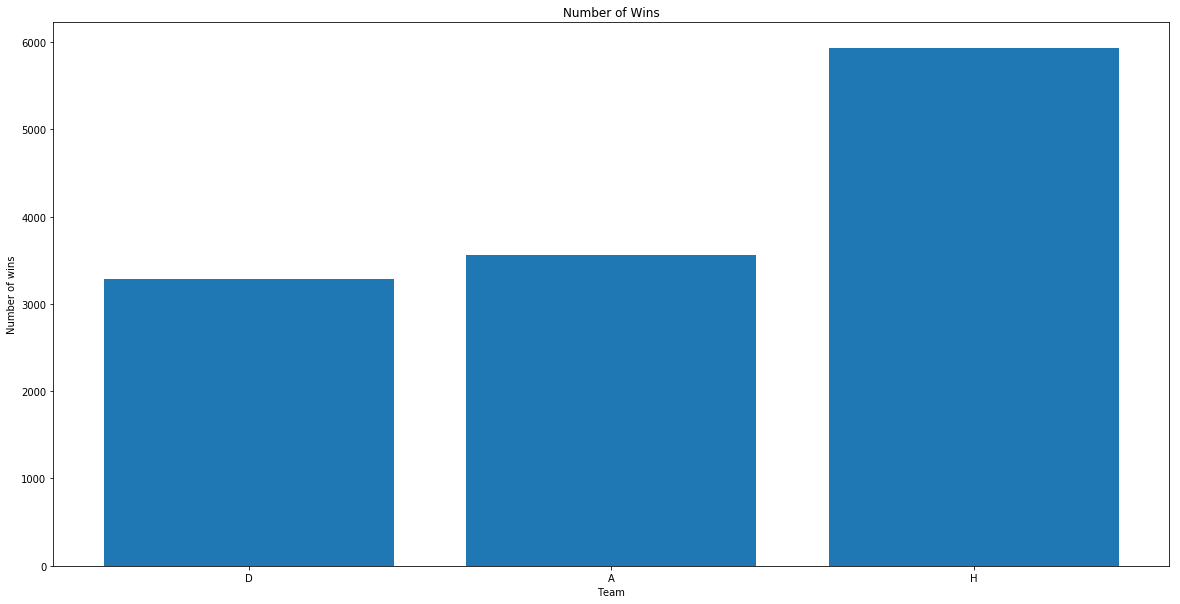

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

wins = dict(df_without_null['FTR'].value_counts())
plt.figure(figsize=(20, 10))
plt.bar(range(len(wins)), list(wins.values()), align='center')
plt.xticks(range(len(wins)), list(wins.keys()))
plt.title("Number of Wins")
plt.xlabel("Team")
plt.ylabel("Number of wins")

From the above visualization we came to know that **Home Team** plays in their ground, match favors to the Home Team.

#### WINS PER LEAGUE ####

Analysis for League :serie-a


<Figure size 432x288 with 0 Axes>

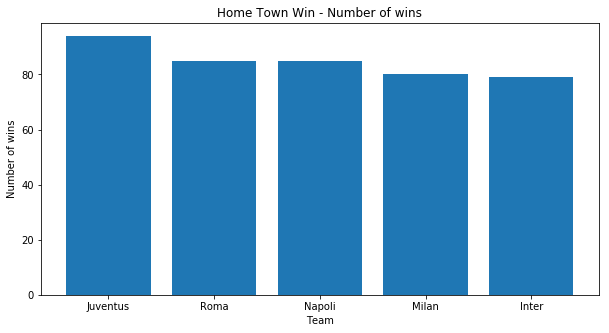

<Figure size 432x288 with 0 Axes>

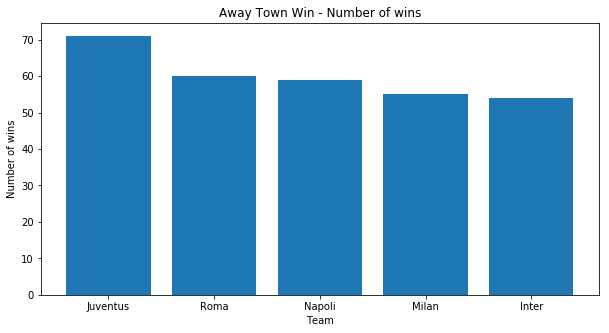

**************************************************
Analysis for League :ligue-1


<Figure size 432x288 with 0 Axes>

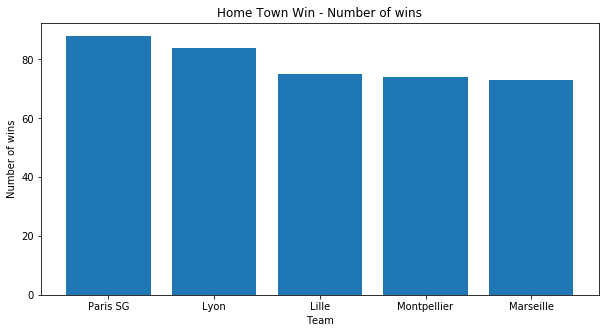

<Figure size 432x288 with 0 Axes>

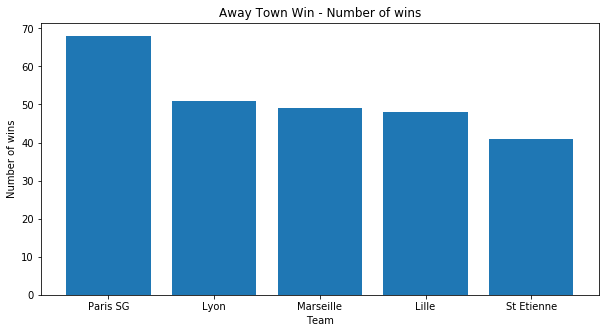

**************************************************
Analysis for League :bundesliga


<Figure size 432x288 with 0 Axes>

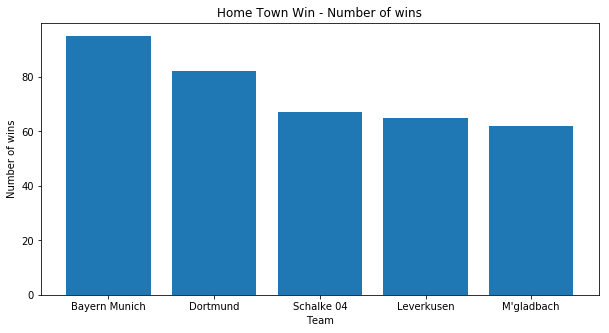

<Figure size 432x288 with 0 Axes>

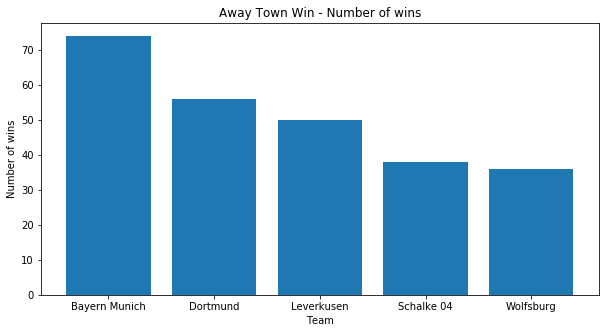

**************************************************
Analysis for League :la-liga


<Figure size 432x288 with 0 Axes>

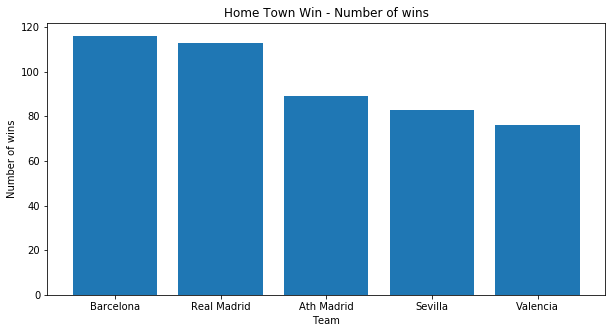

<Figure size 432x288 with 0 Axes>

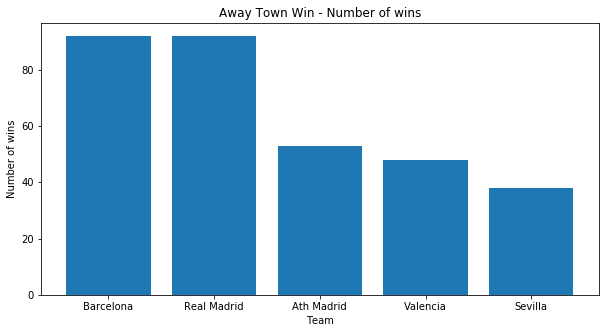

**************************************************
Analysis for League :premier-league


<Figure size 432x288 with 0 Axes>

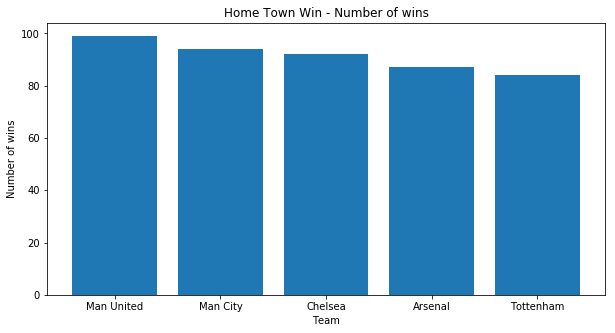

<Figure size 432x288 with 0 Axes>

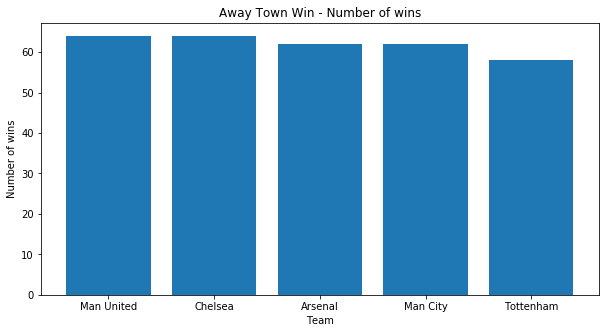

**************************************************


In [15]:
import collections

#get unique league
leagues = list(set(df_without_null['league']))

df = df_without_null.copy() #get copy of the dataframe

def create_an_bar_plot(dict_dump, name):
    most_comm = dict_dump.most_common(5)
    team, wins = [], []
    
    for t,w in most_comm:
        team.append(t)
        wins.append(w)
    
    plt.clf() #clear before re-creating other 
    plt.figure(figsize=(10, 5))
    plt.bar(range(len(most_comm)), list(wins), align='center')
    plt.xticks(range(len(most_comm)), list(team))
    title = "{} - Number of wins".format(name)
    plt.title(title)
    plt.xlabel("Team")
    plt.ylabel("Number of wins")
    
    plt.show()

for lea in leagues:
    
    print("Analysis for League :{}".format(lea))
    per_league_df = df[df['league'] == lea]
    value_counts = dict(per_league_df['FTR'].value_counts()) #dictionary has value counts for FTR
    
    #home team
    home_team = per_league_df[per_league_df['FTR'] == 'H']['HomeTeam'].values #get home team names
    ht_win_frequency = collections.Counter(list(home_team))
    create_an_bar_plot(ht_win_frequency, "Home Town Win") #bar plot
    
    #away team
    away_team = per_league_df[per_league_df['FTR'] == 'A']['AwayTeam'].values #get away team names
    aw_win_frequency = collections.Counter(list(away_team))
    create_an_bar_plot(aw_win_frequency, "Away Town Win") #bar plot
    
    print("*" * 50)

From Above visualization, we understand that if the team wins in **AwayTeam** then the team has high change wining in their **Home Town**!!!

### FEATURE SELECTION AND RANKING ###

Convert dataframe **dtypes** into either **Float or Categorical**

In [25]:
#do label encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
wins_label = encoder.fit_transform(df['FTR'])
team_label = encoder.fit_transform(df['HomeTeam'])
away_label = encoder.fit_transform(df['AwayTeam'])
league = encoder.fit_transform(df['league'])

hometeam_dumps = dict(zip(df['HomeTeam'].values, team_label)) #zip

df['ht_label'] = team_label
df['at_label'] = away_label
df['league_label'] = league

df.head()

,AC,AF,AR,AS,AST,AY,AwayTeam,FTR,HC,HF,...,HST,HTAG,HTHG,HY,HomeTeam,league,timestamp,ht_label,at_label,league_label
0,3.0,12.0,0.0,14.0,4.0,0.0,Stuttgart,H,6.0,12.0,...,7.0,0.0,0.0,0.0,Wolfsburg,bundesliga,2009-08-07,155,135,0
1,1.0,10.0,0.0,7.0,0.0,1.0,FC Koln,H,16.0,8.0,...,11.0,0.0,0.0,0.0,Dortmund,bundesliga,2009-08-08,43,51,0
2,3.0,20.0,0.0,15.0,3.0,2.0,Hannover,H,5.0,16.0,...,4.0,0.0,0.0,3.0,Hertha,bundesliga,2009-08-08,66,64,0
3,10.0,28.0,0.0,9.0,3.0,2.0,Bayern Munich,D,3.0,10.0,...,1.0,1.0,1.0,0.0,Hoffenheim,bundesliga,2009-08-08,67,16,0
4,5.0,28.0,0.0,13.0,7.0,2.0,Leverkusen,D,3.0,22.0,...,4.0,2.0,1.0,1.0,Mainz,bundesliga,2009-08-08,89,82,0


Lable Encoding is Done. Now taking relevant features from the dataset

In [26]:
df.columns

Index(['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'AwayTeam', 'FTR', 'HC', 'HF',
       'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HY', 'HomeTeam', 'league',
       'timestamp', 'ht_label', 'at_label', 'league_label'],
      dtype='object')

In [32]:
cols_to_consider = ['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'HC', 'HF',
       'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HY', 'league_label','ht_label', 'at_label']

###  PROBLEMS IN COLINEARITY AND MULTICOLINEARITY ###

Colinearity is the state where two variables are highly correlated and contain similiar information about the variance within a given dataset. To detect colinearity among variables, simply create a correlation matrix and find variables with large absolute values. 

Multicolinearity on the other hand is more troublesome to detect because it emerges when three or more variables, which are highly correlated, are included within a model. To make matters worst multicolinearity can emerge even when isolated pairs of variables are not colinear.

#### CHI-SQUARED ANALYSIS ####

In [75]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)



#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection
testColumns = ['Embarked','Cabin','Pclass','Age','Name','dummyCat']

for var in cols_to_consider:
    cT.TestIndependence(colX=var,colY="FTR" ) 

AC is NOT an important predictor. (Discard AC from model)
AF is IMPORTANT for Prediction
AR is IMPORTANT for Prediction
AS is IMPORTANT for Prediction
AST is IMPORTANT for Prediction
AY is IMPORTANT for Prediction
HC is IMPORTANT for Prediction
HF is IMPORTANT for Prediction
HR is IMPORTANT for Prediction
HS is IMPORTANT for Prediction
HST is IMPORTANT for Prediction
HTAG is IMPORTANT for Prediction
HTHG is IMPORTANT for Prediction
HY is IMPORTANT for Prediction
league_label is IMPORTANT for Prediction
ht_label is IMPORTANT for Prediction
at_label is IMPORTANT for Prediction


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables=[]
    for i in range(X.shape[1]):
        variables.append(i)
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    return X.iloc[:, variables]

In [38]:
#get the dataframe
inputs = df[cols_to_consider]
Y_label = df['FTR']

calculate_vif_(inputs)

dropping 'HS' at index: 9
dropping 'AS' at index: 3
dropping 'HF' at index: 6
dropping 'AF' at index: 1
dropping 'HST' at index: 6
Remaining variables:


,AC,AR,AST,AY,HC,HR,HTAG,HTHG,HY,league_label,ht_label,at_label
0,3.0,0.0,4.0,0.0,6.0,0.0,0.0,0.0,0.0,0,155,135
1,1.0,0.0,0.0,1.0,16.0,0.0,0.0,0.0,0.0,0,43,51
2,3.0,0.0,3.0,2.0,5.0,0.0,0.0,0.0,3.0,0,66,64
3,10.0,0.0,3.0,2.0,3.0,0.0,1.0,1.0,0.0,0,67,16
4,5.0,0.0,7.0,2.0,3.0,0.0,2.0,1.0,1.0,0,89,82
5,6.0,0.0,5.0,1.0,9.0,0.0,1.0,0.0,2.0,0,107,125
6,3.0,0.0,8.0,2.0,9.0,1.0,2.0,2.0,1.0,0,151,45
7,5.0,1.0,7.0,1.0,11.0,0.0,3.0,0.0,3.0,0,21,88
8,6.0,0.0,3.0,1.0,12.0,0.0,1.0,0.0,2.0,0,54,63
9,2.0,0.0,1.0,0.0,5.0,0.0,1.0,0.0,1.0,0,16,151


**HS, AS, HF, AF, HST** are highly correlated with other variables. Let's try a simple model neglecting these features to see the model performance. 

### CROSS VALIDATION ###

In [41]:
from sklearn.cross_validation import train_test_split

#IMPORT COLUMNS
important_columns = ['AC','AR','AST','AY','HC','HR','HTAG','HTHG','HY','league_label','ht_label','at_label']

#get input and output features
X_all = df[important_columns]
y_all = df['FTR']

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 100,
                                                    random_state = 2,
                                                    stratify = y_all)

#get the shape
print("X-Train, Y-Train Shape:{}".format(X_train.shape, y_train.shape))
print("X-Test, Y-Test Shape:{}".format(X_test.shape, y_test.shape))

X-Train, Y-Train Shape:(12676, 12)
X-Test, Y-Test Shape:(100, 12)


### Training and Evaluating Models ###

In [49]:
#for measuring the time
from time import time
#Metrics to consider, {F1 Score, Precision, Recall}
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    #time start
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    #results
    print("Trained Model in {:2f} seconds".format(end-start))
    
def predict_labels(clf, features, target):
    #time start
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    #results
    print("Made Predictions in {:2f} seconds".format(end-start))
    
    #accuracy
    acc = sum(target == y_pred) / float(len(y_pred))
    
    #micro -> Calculates metrics globally by counting the total true positives
    #false negatives, and false negatives
    
    return f1_score(target, y_pred, average='micro'), acc


def model(clf, X_train, y_train, X_test, y_test):
    
    #train classifier
    train_classifier(clf, X_train, y_train)
    
    f1, acc = predict_labels(clf, X_train, y_train)
    print("For Training Dataset Metrics:")
    print("-" * 15)
    print("F1 Score:{}".format(f1))
    print("Accuracy:{}".format(acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("For Test Dataset Metrics:")
    print("-" * 15)
    print("F1 Score:{}".format(f1))
    print("Accuracy:{}".format(acc))

In [69]:
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

#random seed and n_estimators
#will optimize later with GridSearch

xgb_classifier = xgb.XGBClassifier(seed = 50)
svc_classifier = SVC(random_state= 100, kernel='rbf')
one_vs_all_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')

print("XGB Classifier")
print("-" * 10)
model(xgb_classifier, X_train, y_train, X_test, y_test)

print()

print("Support Vector Machine")
print("-" * 10)
model(svc_classifier, X_train, y_train, X_test, y_test)

print("Logistic Regression one vs All Classifier")
print("-" * 10)
model(one_vs_all_clf, X_train, y_train, X_test, y_test)

XGB Classifier
----------
Trained Model in 2.891247 seconds


c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Made Predictions in 0.193727 seconds
For Training Dataset Metrics:
---------------
F1 Score:0.641132849479331
Accuracy:0.641132849479331
Made Predictions in 0.005764 seconds
For Test Dataset Metrics:
---------------
F1 Score:0.64
Accuracy:0.64

Support Vector Machine
----------
Trained Model in 36.682581 seconds
Made Predictions in 13.927480 seconds
For Training Dataset Metrics:
---------------
F1 Score:0.9603187125276113
Accuracy:0.9603187125276113
Made Predictions in 0.108156 seconds
For Test Dataset Metrics:
---------------
F1 Score:0.47
Accuracy:0.47
Logistic Regression one vs All Classifier
----------
Trained Model in 0.916817 seconds
Made Predictions in 0.006048 seconds
For Training Dataset Metrics:
---------------
F1 Score:0.6256705585358158
Accuracy:0.6256705585358158
Made Predictions in 0.000000 seconds
For Test Dataset Metrics:
---------------
F1 Score:0.61
Accuracy:0.61


### Model Result ###

XGB Classifier seems average accuracy. The accuracy for test dataset seems convincing. But in Support Vector Machine(SVC) the training dataset has good accuracy but the model performs worst in the test dataset.

### Trying to improve the performance ###

In [65]:
#grid search
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def grid_search(clf, X_train, y_train, X_test, y_test):
    
    parameters = {
    'learning_rate': [0.3],
    'n_estimators': [40],
    'max_depth': [2],
    'min_child_weight': [3],
    'gamma': [0.4],
    'subsample': [0.9],
    'scale_pos_weight': [1],
    'reg_alpha':[1e-5]
    }

    f1_scorer = make_scorer(f1_score, pos_label='H', average='micro')
    grid_obj = GridSearchCV(clf, scoring=f1_scorer,
                               param_grid=parameters,
                               cv=5)

    grid_obj = grid_obj.fit(X_train, y_train)

    #get best estimator
    clf = grid_obj.best_estimator_
    print("Best Estimator Parameters:{}".format(clf))

    f1, acc = predict_labels(clf, X_train, y_train)
    print("F1 Score:{}, Accuracy:{}".format(f1, acc))

    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 Score:{}, Accuracy:{}".format(f1, acc))
    

grid_search(clf, X_train, y_train, X_test, y_test)

c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\madhivarman\appdata\local\programs\python\pyth

Best Estimator Parameters:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.4, learning_rate=0.3, max_delta_step=0,
       max_depth=2, min_child_weight=3, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=4,
       silent=True, subsample=0.9)
Made Predictions in 0.055270 seconds
F1 Score:0.6327705900915115, Accuracy:0.6327705900915115
Made Predictions in 0.001000 seconds
F1 Score:0.62, Accuracy:0.62


c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### For case: considering all columns ####

In [77]:
c = ['AC', 'AF', 'AR', 'AS', 'AST', 'AY', 'HC', 'HF',
       'HR', 'HS', 'HST', 'HTAG', 'HTHG', 'HY', 'league_label','ht_label', 'at_label']
dup_x = df[cols_to_consider]

X, X_t, y, y_t = train_test_split(dup_x, y_all, test_size = 100, random_state = 2, stratify = y_all)
clf_2 = xgb.XGBClassifier(seed = 50)

model(clf_2, X, y, X_t, y_t)

Trained Model in 1.843074 seconds
Made Predictions in 0.097740 seconds
For Training Dataset Metrics:
---------------
F1 Score:0.6789207952035342
Accuracy:0.6789207952035342
Made Predictions in 0.000997 seconds
For Test Dataset Metrics:
---------------
F1 Score:0.64
Accuracy:0.64


c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [67]:
grid_search(clf_2, X, y, X_t, y_t)

c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\madhivarman\appdata\local\programs\python\pyth

Best Estimator Parameters:XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.4, learning_rate=0.3, max_delta_step=0,
       max_depth=2, min_child_weight=3, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=1e-05, reg_lambda=1, scale_pos_weight=1, seed=50,
       silent=True, subsample=0.9)
Made Predictions in 0.070570 seconds
F1 Score:0.6702429788576838, Accuracy:0.6702429788576838
Made Predictions in 0.000000 seconds
F1 Score:0.65, Accuracy:0.65


c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\users\madhivarman\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### NOTE ####

Model performance slightly differs with or without all variables. The F1 Score and Accuracy for test dataset increased 1% accuracy by including all variables as features. To improve model performance,

1. We get more data
2. Applying MinMax Standard Scalar. Since it is a classification problem there are lot of HomeTeams are present and number varies from 0 - 100. The range is higher so there is a chance that it might misclassified. Sometimes Normalization helps.

### APPLYING NORMALIZATION ###

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#applying Min Max Standard Scaler
std_Xtrain, std_Xtest = scaler.fit_transform(X_train.values), scaler.fit_transform(X_test.values)

#call the model
model(svc_classifier, std_Xtrain, y_train, std_Xtest, y_test)

Trained Model in 5.415566 seconds
Made Predictions in 2.544202 seconds
For Training Dataset Metrics:
---------------
F1 Score:0.6226727674345219
Accuracy:0.6226727674345219
Made Predictions in 0.019950 seconds
For Test Dataset Metrics:
---------------
F1 Score:0.62
Accuracy:0.62


Our Theory is correct! Since applying normalization to the data actually helps the SVM Classifier to classify the test data correctly. Since the data range is reduced, it helps the classifier to learn quickly and act as a batch normalization for ML Models(ie.., the **y_pred** point do not deviate larger from the hyperplane).